In [1]:
%load_ext lab_black

from puzzles import load

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

In [3]:
from tqdm import tqdm

In [19]:
int(load(13).strip())

1358

---

In [39]:
def generate_labirynth(side: int = 20, shift: int = 0, favorite_number: int = 1358):
    A = np.zeros([side, side], dtype=np.uint8)
    for x1 in tqdm(range(side)):
        for y1 in range(side):
            x = x1 - shift
            y = y1 - shift
            z = x * x + 3 * x + 2 * x * y + y + y * y + favorite_number
            if Counter(f"{z:b}")["1"] % 2 == 1:
                A[y, x] = 1
    return A

In [47]:
import numpy as np
import heapq


def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])


def astar(grid, start, goal):
    movements = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    rows, cols = grid.shape
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {pos: float("inf") for pos in np.ndindex(grid.shape)}
    g_score[start] = 0

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.reverse()
            return path

        for dr, dc in movements:
            neighbor = current[0] + dr, current[1] + dc

            if (
                0 <= neighbor[0] < rows
                and 0 <= neighbor[1] < cols
                and grid[neighbor] == 0
            ):
                tentative_g_score = g_score[current] + 1

                if tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score = tentative_g_score + heuristic(neighbor, goal)
                    heapq.heappush(open_set, (f_score, neighbor))

    return None

In [48]:
grid = generate_labirynth(side=400, shift=100, favorite_number=1358)

# Define start and goal positions
start = (1, 1)
goal = (39, 31)

# Find the shortest path using A*
path = astar(grid, start, goal)
if path:
    print("Shortest Path:", path)
    print("Shortest Distance:", len(path))
else:
    print("No path found")

100%|████████████████████████████████████████| 400/400 [00:00<00:00, 2263.34it/s]


Shortest Path: [(2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (4, 13), (5, 13), (6, 13), (6, 14), (7, 14), (8, 14), (9, 14), (9, 13), (9, 12), (9, 11), (10, 11), (11, 11), (12, 11), (13, 11), (13, 10), (14, 10), (15, 10), (16, 10), (16, 11), (16, 12), (16, 13), (17, 13), (18, 13), (19, 13), (19, 14), (19, 15), (19, 16), (18, 16), (18, 17), (18, 18), (19, 18), (19, 19), (20, 19), (21, 19), (22, 19), (23, 19), (24, 19), (24, 20), (25, 20), (25, 21), (25, 22), (24, 22), (24, 23), (24, 24), (24, 25), (24, 26), (25, 26), (26, 26), (27, 26), (27, 27), (27, 28), (27, 29), (27, 30), (28, 30), (29, 30), (30, 30), (31, 30), (32, 30), (32, 31), (32, 32), (32, 33), (33, 33), (34, 33), (35, 33), (35, 32), (36, 32), (37, 32), (37, 33), (37, 34), (38, 34), (38, 35), (39, 35), (40, 35), (41, 35), (42, 35), (42, 34), (42, 33), (42, 32), (41, 32), (40, 32), (39, 32), (39, 31)]
Shortest Distance: 96


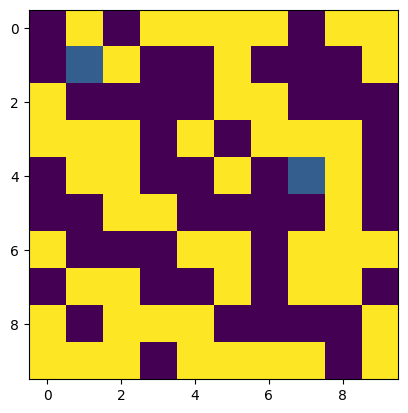

In [45]:
show = grid.copy() * 10
show[1, 1] = 3
show[4, 7] = 3
plt.imshow(show)

---

In [50]:
import numpy as np
import heapq


def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])


def bfs_max_depth(grid, start, max_depth):
    movements = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    rows, cols = grid.shape
    visited = set()
    queue = deque([(0, start)])
    visited.add(start)

    while queue:
        depth, current = queue.popleft()

        if depth >= max_depth:
            continue

        for dr, dc in movements:
            neighbor = current[0] + dr, current[1] + dc

            if (
                0 <= neighbor[0] < rows
                and 0 <= neighbor[1] < cols
                and grid[neighbor] == 0
                and neighbor not in visited
            ):
                visited.add(neighbor)
                queue.append((depth + 1, neighbor))

    return visited

In [51]:
grid = generate_labirynth(side=400, shift=100, favorite_number=1358)

# Define start position
start = (1, 1)

# Determine reachable locations within 50 steps
max_depth = 50
reachable_locations = bfs_max_depth(grid, start, max_depth)

# Include the starting position
reachable_locations.add(start)

print(
    "Number of reachable locations within {} steps: {}".format(
        max_depth, len(reachable_locations)
    )
)

100%|████████████████████████████████████████| 400/400 [00:00<00:00, 2058.67it/s]

Number of reachable locations within 50 steps: 141
